#TODO DO DIA

* Fazer visualizaçao do wavelet 1d
* Fazer visualização do wavelet 2s
* Teste basico com o hamiltoniano

In [1]:
# General informations that would be used for the rest of the notetaking

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.colors
from IPython.display import HTML

plt.ioff() # isso é p n ficar mostrando as figuras sem eu querer
 
plt.rcParams["mathtext.fontset"] = "cm" # Fonte matemática pro latex
plt.rc('font', family='serif') # fonte tipo serif, p fica paredico com latex msm
plt.rc('text', usetex=False) # esse vc deixa True e for salvar em pdf e False se for p salvar png

rgb_light =  ['#ce5825','#2e9a60','#6182e2']
rgb_pallet = ['#cd4100','#007148','#4169E1']
rgb_darker = ['#9e3000','#005738','#304ea6']

cym_light =  ['#82e7ff','#fde974','#ff98ff']
cym_pallet = ['#00ceff','#ffd700','#ff6dff']
cym_pallet = ['#007a96','#b39700','#b04bb0']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"white",rgb_pallet[0]])
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"black",rgb_pallet[0]])



# Notas a respeito do hamiltoniano

## Equaçoes principais:

* Hamiltoniano:
$H(x,y,t) = \frac{\phi(x,y,t)}{B_0} = \frac{1}{B_0} \left[ \phi_0(x) + \sum_i A_i sen(k_{xi}x)cos(k_{yi}y - \omega_i t) \right]$

* Hamiltoniano pra uma onda: 
$H(x,y,t) = \phi_0(x) + A_1 sen(k_{x1}x)cos(k_{y1}y - \omega_1 t)$

* Função geratriz da transformada: $F_2(x',y) = x'(y-v_1 t)$

* Hamiltoniano transformado: $H(x,y) = \phi_0(x) - v_1x + A_1 sen(k_{x1}x)cos(k_{y1}y)$
    * $\frac{dx}{dt} = k_{yi}A_i sen(k_{xi}x)sen(k_{yi}y)$
    * $\frac{dy}{dt} =  \left[\frac{d\phi_0}{dx}  -  v_1\right] + k_{xi}A_i cos(k_{xi}x)cos(k_{yi}y)$






In [2]:
# Variaveis que serao utilizadas:
pi = 3.1415
# Ly = 2pi e Lx = 1
M = 6 
N = 3

w = 3
kx = M*pi 
ky = N 



In [5]:
# Animçao do que acontece para apenas uma onda
plt.ioff()
plt.clf
plt.close()
def H1(grid_x,grid_y,t,A,w,ky,kx):
    return A*np.sin(kx*grid_x)*np.cos(ky*grid_y-w*t)

fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 

x = np.linspace(0,1,300)
y = np.linspace(-pi,pi,300)
grid_x, grid_y = np.meshgrid(x,y)


t = np.linspace(0,2*pi/w,120)

def drawframe(t):
    ax.cla()
    ax.set_title("Aspecto geral: Uma onda pré transformada \n t=" + str(t))
    ax.set_ylabel(r"$x$")
    ax.set_xlabel(r"$y$")
    ax.pcolormesh(grid_y, grid_x,H1(grid_x,grid_y,t,1,w,ky,kx),cmap=cmap)

drawframe(0)
    
#ax.pcolormesh(grid_y, grid_x,np.sin(grid_x*grid_y*5 + n*0.1),cmap=cmap)

anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=50)
#
HTML(anim.to_html5_video())




Rede de pontos hiperbolicos e elipticos


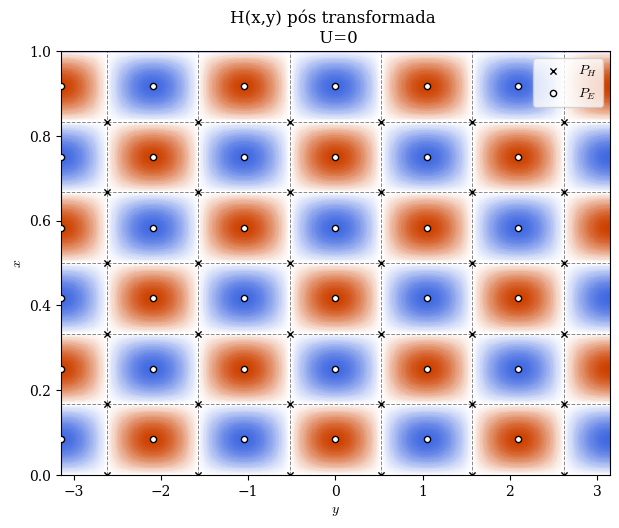

In [6]:
# Visualizaçao do hamiltoniano para apenas uma onda:
def H1(grid_x,grid_y,t,A,w,ky,kx):
    return A*np.sin(kx*grid_x)*np.cos(ky*grid_y-w*t)

plt.ioff()
ax.cla
plt.clf
plt.close()

fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel("$x$")
ax.set_xlabel("$y$")
ax.set_ylim(0,1)
ax.set_xlim(-pi,pi)

# Demarca os limites 
ax.axhline(1, color = 'b', linestyle = "-", linewidth = 1)


# Desenha os limites das células
for m in range(0,M+1):
    ax.axhline(m/M, color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)
for n in range(-N,N):
    ax.axvline((2*n+1)*pi/(2*N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)


## Fas o contorno colorido
x = np.linspace(0,1,500)
y = np.linspace(-pi,pi,500)
grid_x, grid_y = np.meshgrid(x,y)
ax.pcolormesh(grid_y, grid_x,H1(grid_x,grid_y,0,1,w,ky,kx),cmap=cmap)

ax.contour(grid_y, grid_x,H1(grid_x,grid_y,0,1,w,ky,kx),cmap=cmap, levels = 9)

## Pontos elipticos
x = np.array([])
y = np.array([])
for m in range(0,M):
    x = np.append(x,m/M)
for n in range(-N,N):
    y = np.append(y,(2*n+1)*pi/(2*N))
grid_x, grid_y = np.meshgrid(x,y)

ax.scatter(grid_y,grid_x, s = 20, color = '#000000',marker="x",linewidth = 1, edgecolor = "#ffffff", zorder = 3, label = r"$P_H$")

## Pontos hiperbolicos
x = np.array([])
y = np.array([])
for m in range(0,M):
    x = np.append(x,(2*m+1)/(2*M))
for n in range(-N,N):     
    y = np.append(y,n*pi/N)
grid_x, grid_y = np.meshgrid(x,y)
ax.scatter(grid_y,grid_x, s = 20, color = '#ffffff',edgecolor = "black", zorder = 3, label = r"$P_E$")

print("Rede de pontos hiperbolicos e elipticos")
ax.set_title("H(x,y) pós transformada \n U=0")
ax.legend()
plt.show()
plt.close()


In [7]:
# Animçao do que acontece para apenas duas onda

plt.ioff()
plt.clf
plt.close()

def H(grid_x,grid_y,t,A,w,ky,kx,c_w):
    R = 0
    for i in range(0,len(A)):
        R += A[i]*np.sin(kx[i]*grid_x)*np.cos(ky[i]*(grid_y-(w[i]/ky[i] - w[c_w]/ky[c_w])*t))
    return R

def teste(A):
    for i in range(0,len(A)):
        print(A[i])

# Ly = 2pi e Lx = 1
M = 6 
N = 3

A = [1,1]
w = [3,5]
kx = [M*pi,M*np.sqrt(7)] 
ky = [N,N]


plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel(r"$x$")
ax.set_xlabel(r"$y$")
ax.set_ylim(0,1.1)
ax.set_xlim(-pi,pi)

x = np.linspace(0,1,300)
y = np.linspace(-pi,pi,300)
grid_x, grid_y = np.meshgrid(x,y)

cw = 0
t = np.linspace(0,2*pi/(ky[1]*(w[1]/ky[1] - w[cw]/ky[cw])),120)

def drawframe(t):
    #print(t)
    ax.cla()
    ax.pcolormesh(grid_y, grid_x,H(grid_x,grid_y,t,A,w,ky,kx,cw),cmap=cmap)
    ax.set_title("H(x,y,t) para duas ondas")
    #ax.contour(grid_y, grid_x,H(grid_x,grid_y,t,A,w,ky,kx,cw),cmap=cmap2, levels = 17)


anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=10)

HTML(anim.to_html5_video())




In [95]:
## Teste das wavelets

def wavelet(A,x,t,sigma,wg,kg,wf,kf):
    return A*np.exp(-0.5*(kg*x-wg*t)**2/(sigma*sigma))*np.cos(kf*x-wf*t)

fig, ax = plt.subplots()
plt.ioff()
fig.set_size_inches(18*0.393, 7*0.393) # diminuir na metade p 
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")

x = np.linspace(-pi,pi,101)



#ax.plot(x,wavelet(1,x,0,0.5,1))
#plt.show()

t = np.linspace(-pi,pi,240)


sigma = 0.5
def drawframe(t): # Define uma funçao que vai plotar cada frame
    #print(t)
    t = t%pi
    ax.cla() # limpa os dados anteriores
    ax.set_title(str(t))
    ax.set_ylim(-1,1) # ajeita os limites
    ax.set_xlim(-pi,pi)
    ax.plot(x,wavelet(1,x,t,sigma,1,1,1,1))
    ax.plot(x,envelope(1,x,t,sigma,1,1,1,1))

# Ai vc cria um objeto com essa funçao aq em baixo:
# fig é o objeto figura do matplotlib, drawframe é a funçao q plota
#   frames é o arrary q vc vai iterar p animaçao
#   interval é o tempo entre cada frame, 20 da 60 fps se n me engano
anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=20)

# Usa esse comando aq p fazer de fato o vídeo
HTML(anim.to_html5_video())



In [57]:
## Animação perturbação wavelet em x-y:

plt.clf
plt.close()

def Hwavelet(x,y,t,sigma,A,kx,wg,kg,wf,kf):
    return A*np.cos(kx*x)*np.exp(-0.5*(((kg*y-wg*t)))**2)/(2*sigma*sigma)*np.cos(kf*y-wf*t)

def wavelet(A,x,t,sigma,wg,kg,wf,kf):
    return A*np.exp(-0.5*(kg*x-wg*t)*(kg*x-wg*t)/(2*sigma*sigma))*np.cos(kf*x-wf*t)

def envelope(A,x,t,sigma,wg,kg,wf,kf):
    return A*np.exp(-0.5*(kg*x-wg*t)*(kg*x-wg*t)/(2*sigma*sigma))

def H1(grid_x,grid_y,t,A,w,ky,kx):
    return A*np.sin(kx*grid_x)*np.cos(ky*grid_y-w*t)

A = 1
w = 1
kx = M*pi 
ky = N
wf = 4
kf = ky



plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel(r"$x$")
ax.set_xlabel(r"$y$")
ax.set_ylim(0,1.1)
ax.set_xlim(-pi,pi)

x = np.linspace(0,1,100)
y = np.linspace(-pi,pi,100)
grid_x, grid_y = np.meshgrid(x,y)

t = np.linspace(-10,10,340)

def drawframe(t):
    #print(t)
    ax.cla()
    ax.pcolormesh(grid_y, grid_x,HHwavelet(grid_x,grid_y,t,1,A,kx,w,ky,w,ky),cmap=cmap,vmax=1,vmin=-1)

anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=20)

HTML(anim.to_html5_video())



-10.0
-10.0
-9.941002949852507
-9.882005899705014
-9.823008849557523
-9.76401179941003
-9.705014749262537
-9.646017699115044
-9.587020648967552
-9.52802359882006
-9.469026548672566
-9.410029498525073
-9.35103244837758
-9.29203539823009
-9.233038348082596
-9.174041297935103
-9.11504424778761
-9.056047197640119
-8.997050147492626
-8.938053097345133
-8.87905604719764
-8.820058997050147
-8.761061946902656
-8.702064896755163
-8.64306784660767
-8.584070796460177
-8.525073746312685
-8.466076696165192
-8.4070796460177
-8.348082595870206
-8.289085545722713
-8.23008849557522
-8.171091445427729
-8.112094395280236
-8.053097345132743
-7.994100294985251
-7.935103244837759
-7.876106194690266
-7.817109144542773
-7.75811209439528
-7.699115044247788
-7.6401179941002955
-7.5811209439528024
-7.522123893805309
-7.463126843657817
-7.404129793510324
-7.345132743362832
-7.286135693215339
-7.227138643067846
-7.168141592920354
-7.109144542772862
-7.050147492625369
-6.991150442477876
-6.932153392330384
-6.873156

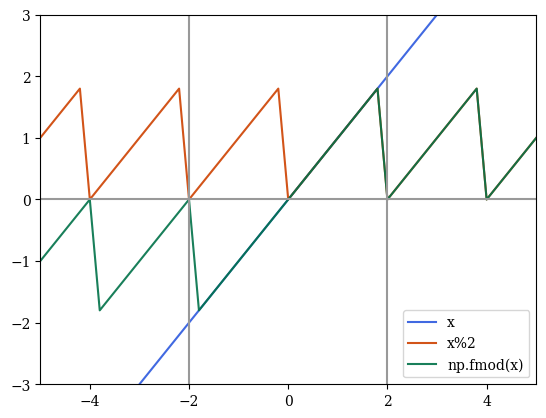

In [38]:
## Teste de função mod pra periodicidade
x = np.linspace(-5,5,51)
import math as mt
plt.close()
fig, ax = plt.subplots()
ax.plot(x,x,color = rgb_pallet[2], label = "x")
ax.plot(x,x%2,color = rgb_pallet[0], label = "x%2",alpha = 0.9)
ax.plot(x,np.fmod(x,2),color = rgb_pallet[1], label = "np.fmod(x)",alpha = 0.9)
ax.set_xlim(-5,5)
ax.set_ylim(-3,3)
ax.axvline(+2, color = "#999999")
ax.axvline(-2, color = "#999999")
ax.axhline(0, color = "#999999")
ax.legend()
plt.show()